### Importa as libs


In [17]:
from sklearn.linear_model import LinearRegression

from scipy.stats import kurtosis
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")


### carrega o arquivo csv


In [18]:

df_cerveja = pd.read_csv('cerveja.csv', sep=';')
df_cerveja.head()


,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [19]:
df_cerveja.tail()


,data,temp_media,temp_min,temp_max,chuva,fds,consumo
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22446


### numero de colunas e linhas do arquivo


In [20]:
df_cerveja.shape


(365, 7)

### indica se tem dados faltantes


In [21]:
df_cerveja.isna().sum()


data          0
temp_media    0
temp_min      0
temp_max      0
chuva         0
fds           0
consumo       0
dtype: int64

### mostra o tipo dos dados


In [22]:
df_cerveja.dtypes


data           object
temp_media    float64
temp_min      float64
temp_max      float64
chuva         float64
fds             int64
consumo         int64
dtype: object

### correlação entre as variaveis


In [23]:
df_cerveja.corr()


,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
chuva,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fds,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


### tabela descritiva das variaveis


In [24]:
df_cerveja.describe()


,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


### a maiorida dos dados não são no final de semana


Text(0, 0.5, '')

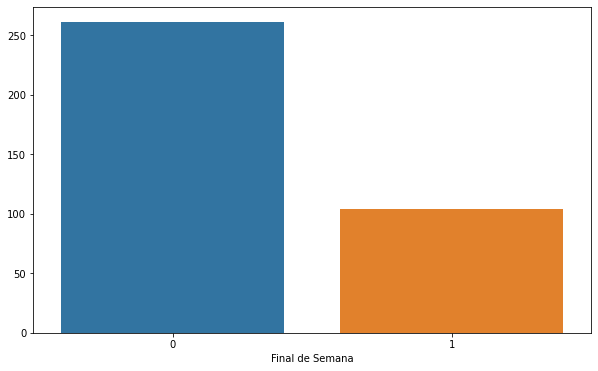

In [26]:


plt.figure(figsize=(10, 6))
sns.countplot(x='fds', data=df_cerveja)
plt.xlabel('Final de Semana')
plt.ylabel('')


### grafico do consumo de cerveja


Text(0.5, 1.0, 'Consumo de cerveja')

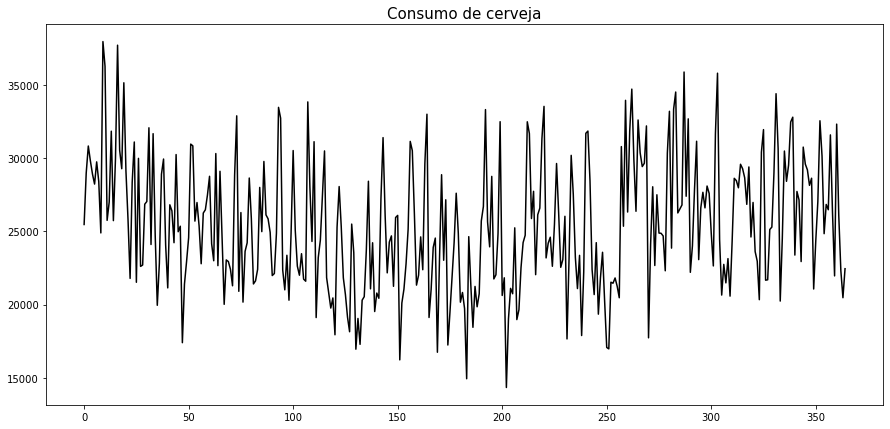

In [28]:
df_cerveja['consumo'].plot(figsize=(15, 7), color='black')
plt.title('Consumo de cerveja', size=15)


### gráfico de disperssão


<AxesSubplot:xlabel='consumo', ylabel='chuva'>

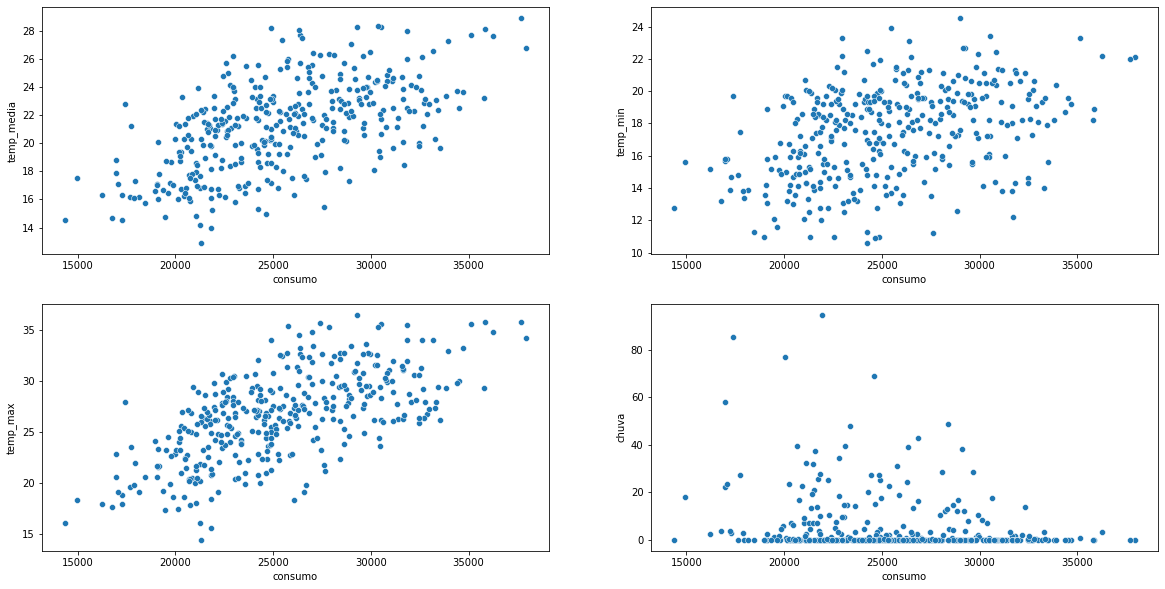

In [33]:
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.scatterplot(x='consumo',
                y='temp_media', data=df_cerveja, ax=ax[0][0])
sns.scatterplot(x='consumo',
                y='temp_min', data=df_cerveja, ax=ax[0][1])
sns.scatterplot(x='consumo',
                y='temp_max', data=df_cerveja, ax=ax[1][0])
sns.scatterplot(x='consumo',
                y='chuva', data=df_cerveja, ax=ax[1][1])
